In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

# SCALING
from sklearn.preprocessing import StandardScaler


In [30]:
df_train = pd.read_csv('df_no_nan.csv', header = 0)
df_train

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_missing_ind,LotFrontage_missing_ind,MasVnrArea_missing_ind
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,2,2008,WD,Normal,208500,0,0,0
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,5,2007,WD,Normal,181500,0,0,0
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,9,2008,WD,Normal,223500,0,0,0
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,...,0,0,8,2007,WD,Normal,175000,0,0,0
1456,1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,0,0,2,2010,WD,Normal,210000,0,0,0
1457,1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,...,0,2500,5,2010,WD,Normal,266500,0,0,0
1458,1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,...,0,0,4,2010,WD,Normal,142125,0,0,0


In [31]:
num_feats = list(df_train.dtypes[df_train.dtypes != 'object'].index)
num_feats

['Unnamed: 0',
 'Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'GarageYrBlt_missing_ind',
 'LotFrontage_missing_ind',
 'MasVnrArea_missing_ind']

<AxesSubplot:xlabel='1stFlrSF'>

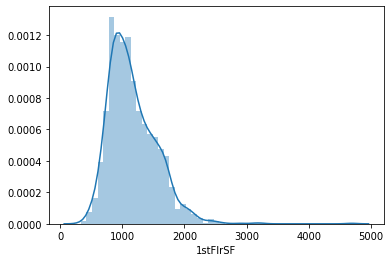

In [32]:
sns.distplot(df_train["1stFlrSF"])

<AxesSubplot:xlabel='1stFlrSF_log'>

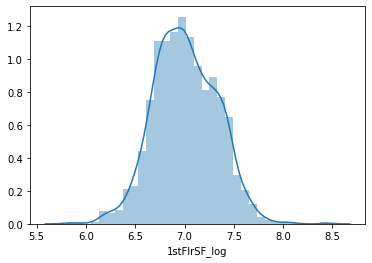

In [33]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.distplot(df_train["1stFlrSF_log"])

<AxesSubplot:xlabel='GrLivArea'>

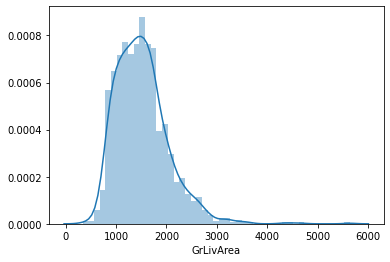

In [42]:
sns.distplot(df_train["GrLivArea"])

<AxesSubplot:xlabel='GrLivArea_log'>

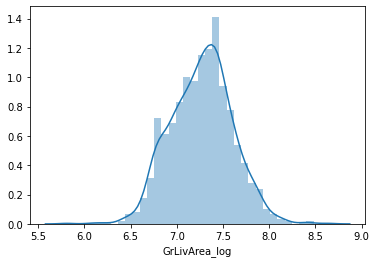

In [41]:
df_train["GrLivArea_log"] = df_train["GrLivArea"].apply(np.log)
sns.distplot(df_train["GrLivArea_log"])

<AxesSubplot:xlabel='LotArea'>

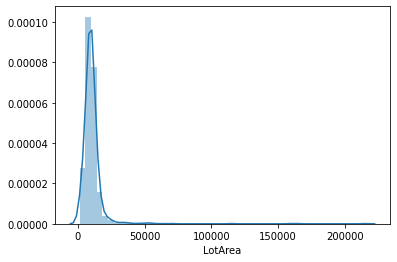

In [45]:
sns.distplot(df_train['LotArea'])

<AxesSubplot:xlabel='LotArea_log'>

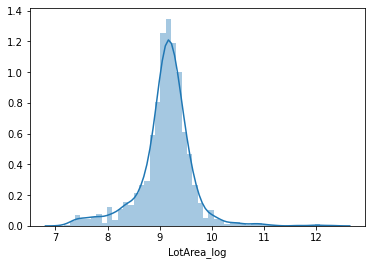

In [46]:
df_train["LotArea_log"] = df_train["LotArea"].apply(np.log)
sns.distplot(df_train["LotArea_log"])

In [47]:
scaller = StandardScaler()
df_train_scaled = pd.DataFrame(scaller.fit_transform(df_train[num_feats+["1stFlrSF_log", "GrLivArea_log","LotArea_log"]].astype(float)))

In [48]:
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-1.730865,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,...,-0.087688,-1.599111,0.138777,0.347273,-0.24236,-0.464385,-0.074227,-0.803570,0.529260,-0.133231
1,-1.728492,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,...,-0.087688,-0.489110,-0.614439,0.007288,-0.24236,-0.464385,-0.074227,0.418585,-0.381846,0.113442
2,-1.726120,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,...,-0.087688,0.990891,0.138777,0.536154,-0.24236,-0.464385,-0.074227,-0.576560,0.659675,0.420061
3,-1.723747,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,...,-0.087688,-1.599111,-1.367655,-0.515281,-0.24236,-0.464385,-0.074227,-0.439287,0.541511,0.103347
4,-1.721374,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,...,-0.087688,2.100892,0.138777,0.869843,-0.24236,-0.464385,-0.074227,0.112267,1.282191,0.878409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,...,-0.087688,0.620891,-0.614439,-0.074560,-0.24236,-0.464385,-0.074227,-0.465607,0.416680,-0.259188
1456,1.723747,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,...,-0.087688,-1.599111,1.645210,0.366161,-0.24236,-0.464385,-0.074227,1.981135,1.106592,0.725419
1457,1.726120,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,...,4.953112,-0.489110,1.645210,1.077611,-0.24236,-0.464385,-0.074227,0.228338,1.469942,-0.002325
1458,1.728492,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,...,-0.087688,-0.859110,1.645210,-0.488523,-0.24236,-0.464385,-0.074227,-0.077573,-0.854471,0.136861


# Categorical variables

In [49]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [50]:
df_train

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,GarageYrBlt_missing_ind,LotFrontage_missing_ind,MasVnrArea_missing_ind,1stFlrSF_log,2ndFlrSF_log,LotArea_log,GrLivArea_log
0,0,1,60,RL,65.0,8450,2,4,Lvl,4,...,WD,Normal,208500,0,0,0,6.752270,6.749931,9.041922,7.444249
1,1,2,20,RL,80.0,9600,2,4,Lvl,4,...,WD,Normal,181500,0,0,0,7.140453,-inf,9.169518,7.140453
2,2,3,60,RL,68.0,11250,2,3,Lvl,4,...,WD,Normal,223500,0,0,0,6.824374,6.763885,9.328123,7.487734
3,3,4,70,RL,60.0,9550,2,3,Lvl,4,...,WD,Abnorml,140000,0,0,0,6.867974,6.628041,9.164296,7.448334
4,4,5,60,RL,84.0,14260,2,3,Lvl,4,...,WD,Normal,250000,0,0,0,7.043160,6.959399,9.565214,7.695303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,2,4,Lvl,4,...,WD,Normal,175000,0,0,0,6.859615,6.542472,8.976768,7.406711
1456,1456,1457,20,RL,85.0,13175,2,4,Lvl,4,...,WD,Normal,210000,0,0,0,7.636752,-inf,9.486076,7.636752
1457,1457,1458,70,RL,66.0,9042,2,4,Lvl,4,...,WD,Normal,266500,0,0,0,7.080026,7.049255,9.109636,7.757906
1458,1458,1459,20,RL,68.0,9717,2,4,Lvl,4,...,WD,Normal,142125,0,0,0,6.982863,-inf,9.181632,6.982863


In [51]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

In [53]:
cat_feats

['MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [52]:
df_dummy

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [54]:
df_transformed = df_train
df_transformed.to_csv('df_transformed.csv', sep = ',')